In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [6]:
df.shape

(103, 7)

# Data Cleaning

### 1) In Production (Tons) we have 2 decimals we have to remove 2 decimals
### 2) In Production per Person (Kg) we have dot and comma! we need to remove the decimal and replace comma with decimal
### 3) Similarly we have dot and comma in Yield (Kg / Hectare) as well ! we will remove them as well

In [7]:
df['Production (Tons)']          = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)']          = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']       = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


###  Renaming column with removing spaces for easy to work with

In [9]:
df.rename(columns= { 'Production (Tons)' : 'Production(Tons)' }, inplace = True)
df.rename(columns= { 'Production per Person (Kg)': 'Production_per_Person_(Kg)' }, inplace = True)
df.rename(columns= { 'Acreage (Hectare)': 'Acreage(Hectare)' }, inplace = True)
df.rename(columns= { 'Yield (Kg / Hectare)': 'Yield(Kg/Hectare)' }, inplace = True)

In [10]:
df

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


# Handeling null value

### checking null  values

In [11]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Acreage(Hectare)              1
Yield(Kg/Hectare)             1
dtype: int64

In [12]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


### removing null value from the data 

In [13]:
df = df.dropna().reset_index()
df

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [14]:
df.drop(['index','Unnamed: 0'], axis = 1, inplace = True)

### drops unwanted column

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)              object
Production_per_Person_(Kg)    object
Acreage(Hectare)              object
Yield(Kg/Hectare)             object
dtype: object

### converting the quantative column to float data type

In [17]:
df['Production(Tons)'] = df['Production(Tons)'].astype('float')
df['Production_per_Person_(Kg)'] = df['Production_per_Person_(Kg)'].astype('float')
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype('float')
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype('float')

In [18]:
df.dtypes

Country                        object
Continent                      object
Production(Tons)              float64
Production_per_Person_(Kg)    float64
Acreage(Hectare)              float64
Yield(Kg/Hectare)             float64
dtype: object

### checking for duplicate value does we have any duplicate column or not 

In [19]:
df.nunique()

Country                       102
Continent                       6
Production(Tons)              102
Production_per_Person_(Kg)    101
Acreage(Hectare)              101
Yield(Kg/Hectare)             102
dtype: int64

# Univariate Analysis

In [20]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


###          covering question based on univariate analysis

# Countries count in each continent producing sugarcane.

In [21]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

# Distribution of columns

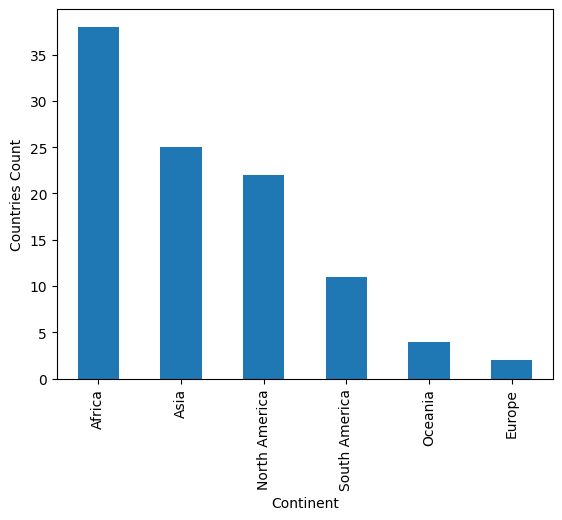

In [22]:
df['Continent'].value_counts().plot(kind = 'bar')
plt.ylabel('Countries Count') 
plt.show()

### Africa continent with the highest production 

In [23]:
df

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


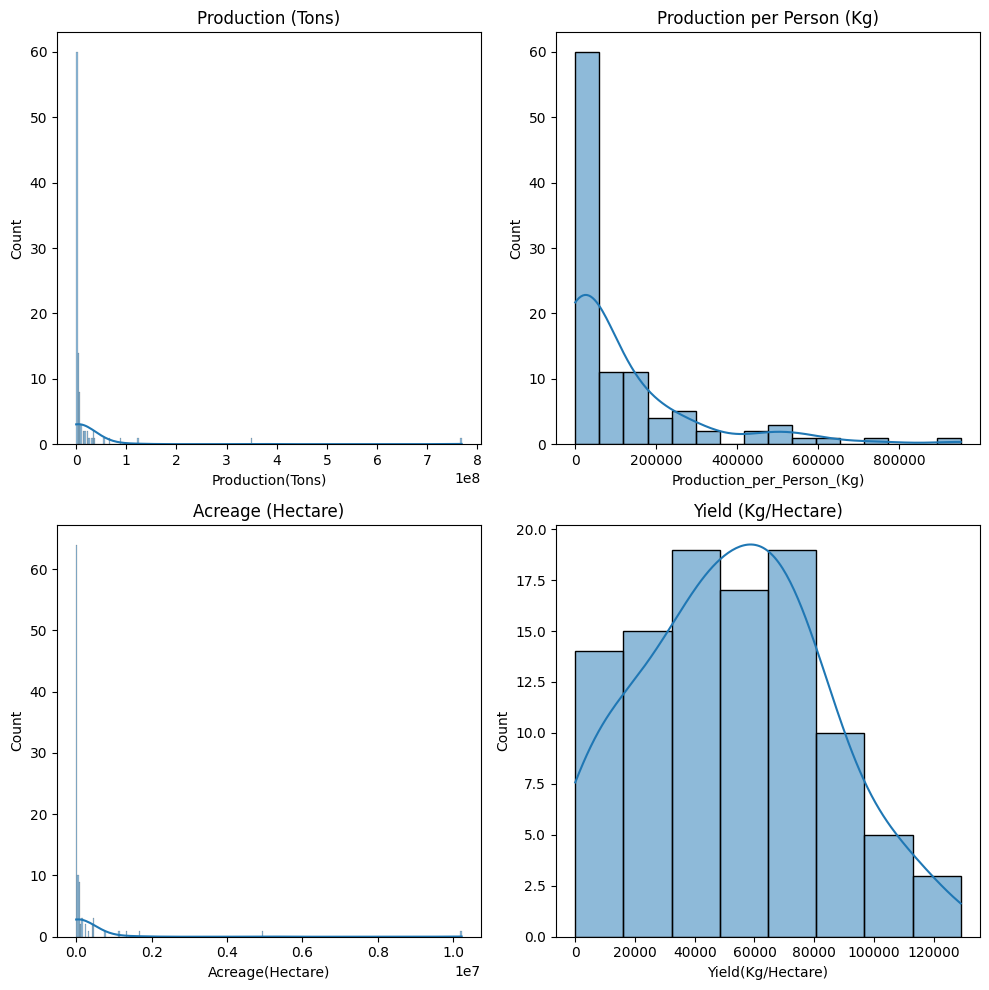

In [24]:

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.histplot(df['Production(Tons)'], kde=True)
plt.title('Production (Tons)')

plt.subplot(2,2,2)
sns.histplot(df['Production_per_Person_(Kg)'], kde=True)
plt.title('Production per Person (Kg)')

plt.subplot(2,2,3)
sns.histplot(df['Acreage(Hectare)'], kde=True)
plt.title('Acreage (Hectare)')

plt.subplot(2,2,4)
sns.histplot(df['Yield(Kg/Hectare)'], kde=True)
plt.title('Yield (Kg/Hectare)')

plt.tight_layout()
plt.show()

### we having skewd data for Production(Tons), Production_Per_Person(Kg) and Acreage(Hectare) because maximum value is too far from maximum data density
### but in Yield(Kg/Hectare) isn't skewd doesn't having outliers

# checking outliers

Text(0.5, 1.0, 'Production (Tons)')

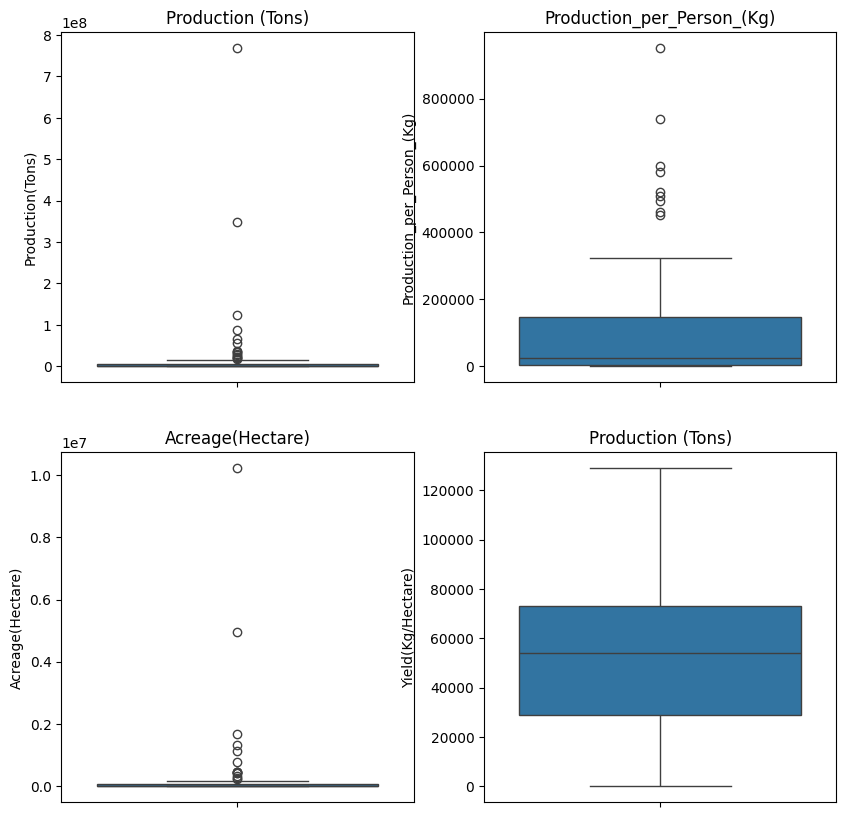

In [25]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.title('Production (Tons)')

plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person_(Kg)'])
plt.title('Production_per_Person_(Kg)')

plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.title('Acreage(Hectare)')

plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.title('Production (Tons)')

### we having outliers for Production(Tons), Production_Per_Person(Kg) and Acreage(Hectare) 
### but in Yield(Kg/Hectare) isn't skewd doesn't having outliers

In [26]:
df.describe()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

In [27]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# which country produces maximum sugarcanes

In [28]:
df_new = df[['Country', 'Production(Tons)']].set_index('Country')

In [29]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


### Brazil with the most prodcution

### sugarcane prodcuiton by country in %

In [30]:
df_new['Production(Tons)_percentage'] = df_new['Production(Tons)']*100/df['Production(Tons)'].sum()

In [31]:
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percentage'>

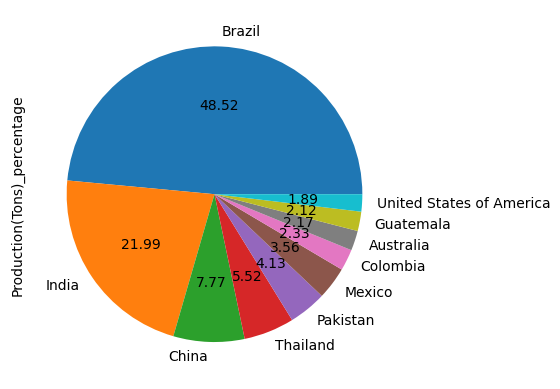

In [60]:
df_new['Production(Tons)_percentage'].head(10).plot(kind = 'pie', autopct = '%.2f')

### top 10 country having maximum production

<Axes: xlabel='Country'>

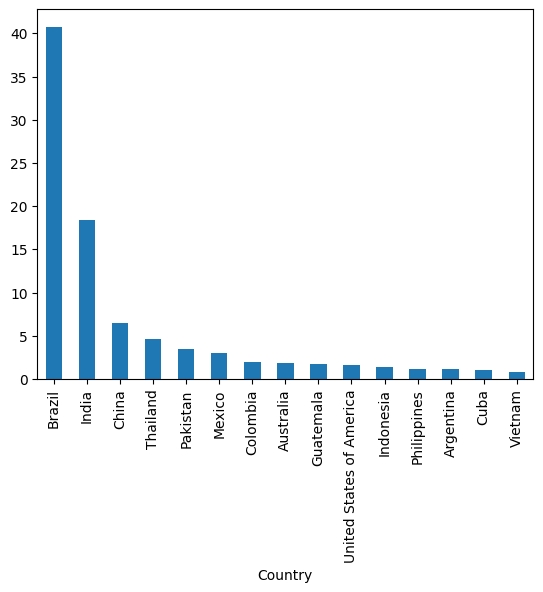

In [33]:
df_new['Production(Tons)_percentage'].head(15).plot(kind = 'bar')

C:\Users\ajayt\AppData\Local\Temp\ipykernel_312\3796562057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df.head(10), x = 'Country', y = 'Production(Tons)', palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

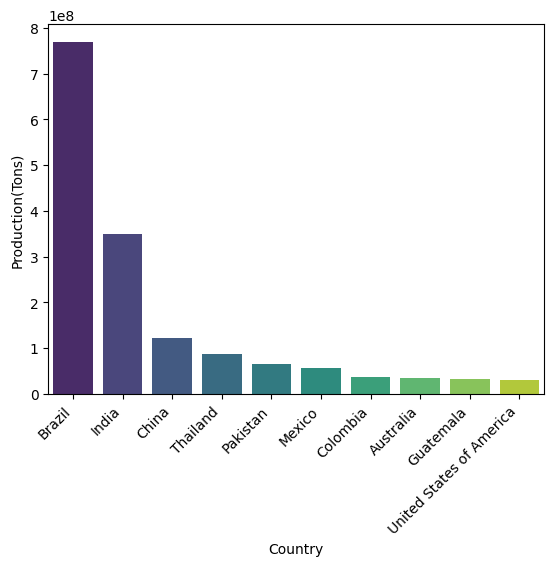

In [34]:
sns.barplot(data = df.head(10), x = 'Country', y = 'Production(Tons)', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show

# which country have highest Lands

<function matplotlib.pyplot.show(close=None, block=None)>

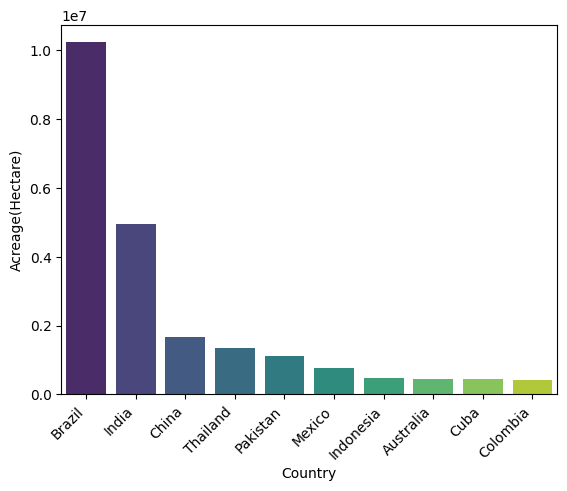

In [35]:
df_sort_Acreage = df.sort_values(by = 'Acreage(Hectare)', ascending = False)
sns.barplot(data = df_sort_Acreage.head(10), x = 'Country', hue='Country', y = 'Acreage(Hectare)', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show

### Brazil having the highest land for production sugarcane

# which country has highest yield per hectare

In [36]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<function matplotlib.pyplot.show(close=None, block=None)>

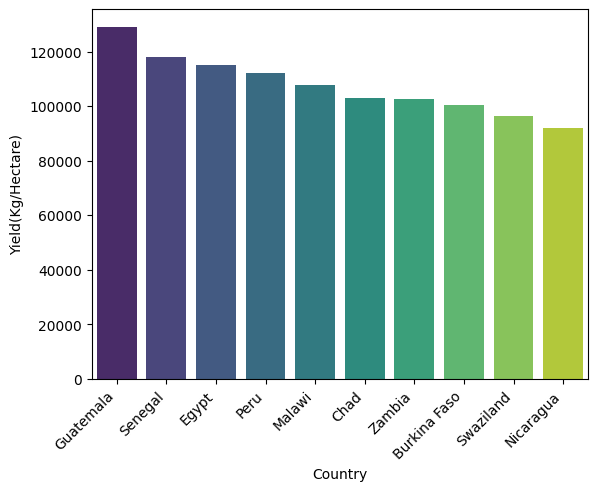

In [37]:
df_sort_Hectare = df.sort_values(by = 'Yield(Kg/Hectare)', ascending = False)
sns.barplot(data = df_sort_Hectare.head(10), x = 'Country', hue='Country', y = 'Yield(Kg/Hectare)', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show

# correlation

In [38]:
numeric_df = df.select_dtypes(include = ('float64', 'int64'))
numeric_df.corr()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person_(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


### Production(Tons) and Acreage(Hectare)	 are very likely to correlated 

## Heatmap for checking correlation via visualization

<Axes: >

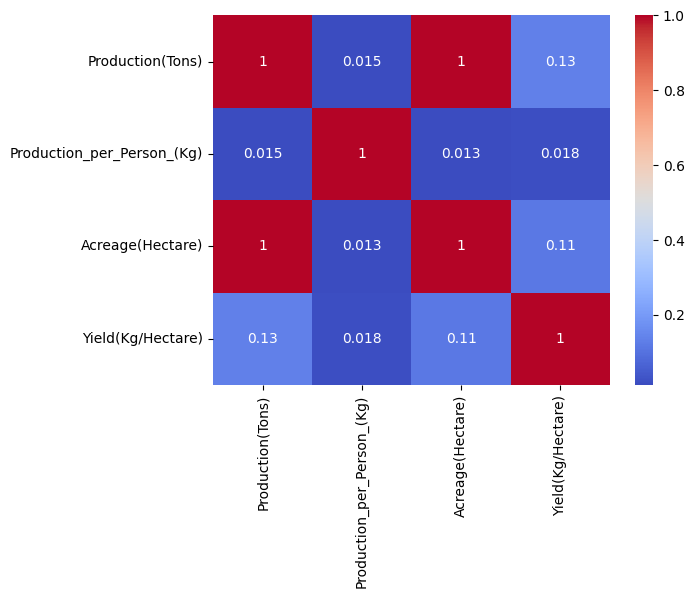

In [39]:
sns.heatmap(numeric_df.corr(), annot = True ,cmap='coolwarm')

# Do contries with highest land produce more sugarcane

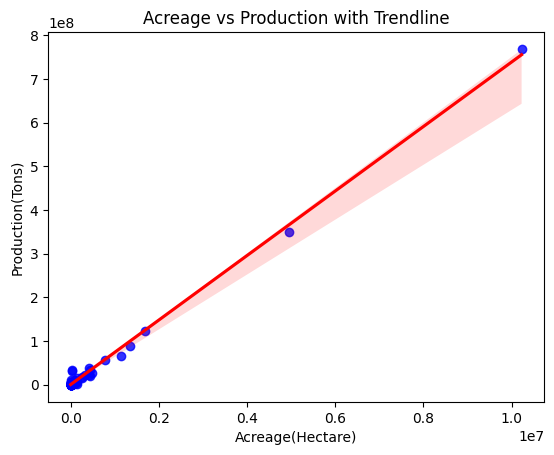

In [64]:
sns.regplot(data=df, x='Acreage(Hectare)', y='Production(Tons)', scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Acreage vs Production with Trendline")
plt.show()

# Analysis for Continent

# Which continent produces maximum production

In [41]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [42]:
df_continent = df.groupby('Continent').sum()
df_continent.drop(columns=['Country'], inplace = True)
df_continent

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


### South America have the maximum production by continent

<Axes: xlabel='Continent'>

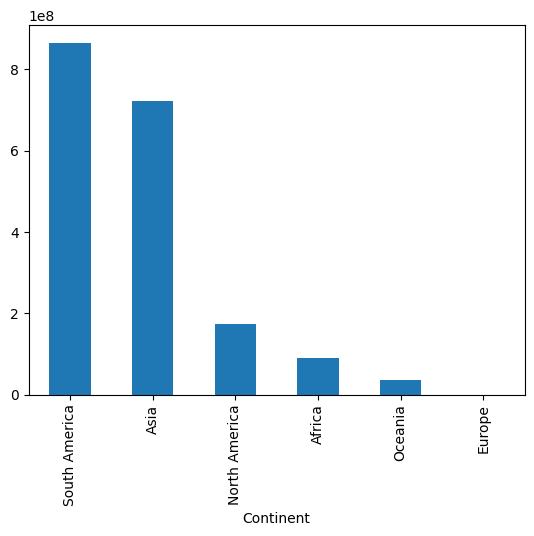

In [43]:
df_continent['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')

In [44]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

# Does No of countries in continent affect production 

In [45]:
df_continent["countries_in_continent"] = df.groupby('Continent').count()['Country']

In [46]:
df_continent

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),countries_in_continent
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


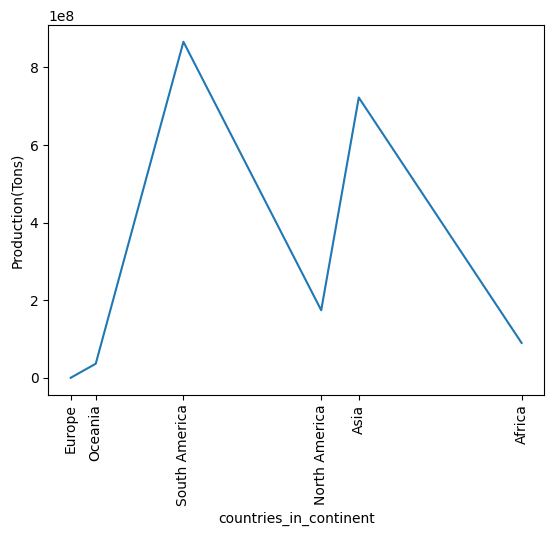

In [47]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent, x = 'countries_in_continent', y  ='Production(Tons)')
plt.xticks(df_continent["countries_in_continent"],continent_names, rotation =90)
plt.show()

### above chart clearly shows no of countries doesn't effect prodcution

# Do continent with highest land produces more sugarcane ?

In [48]:
df_continent

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),countries_in_continent
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

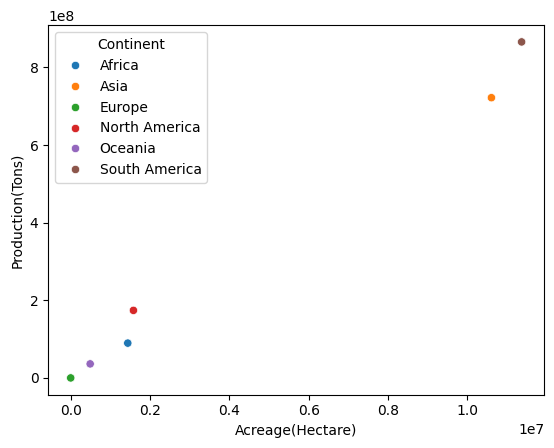

In [49]:
sns.scatterplot(data = df_continent, x = 'Acreage(Hectare)', y  ='Production(Tons)', hue = "Continent")

### yes continent with highest land produces more sugarcane

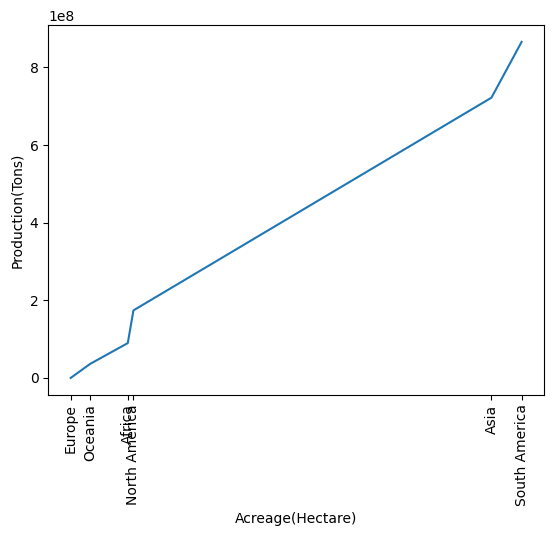

In [50]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent, x = 'Acreage(Hectare)', y  ='Production(Tons)')
plt.xticks(df_continent["Acreage(Hectare)"],continent_names, rotation =90)
plt.show()

# Production distribution by continent

<Axes: ylabel='Production(Tons)'>

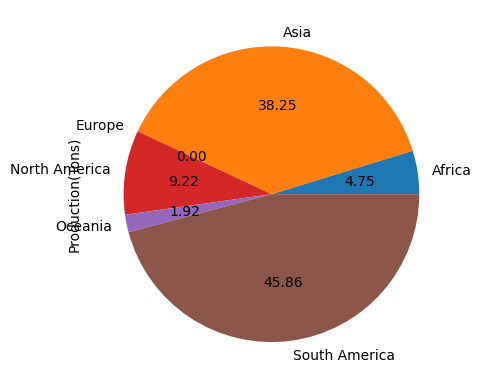

In [51]:
df_continent['Production(Tons)'].plot(kind = 'pie', autopct = '%.2f')

# Correlation for continent

In [52]:
df_continent.corr()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),countries_in_continent
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person_(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
countries_in_continent,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

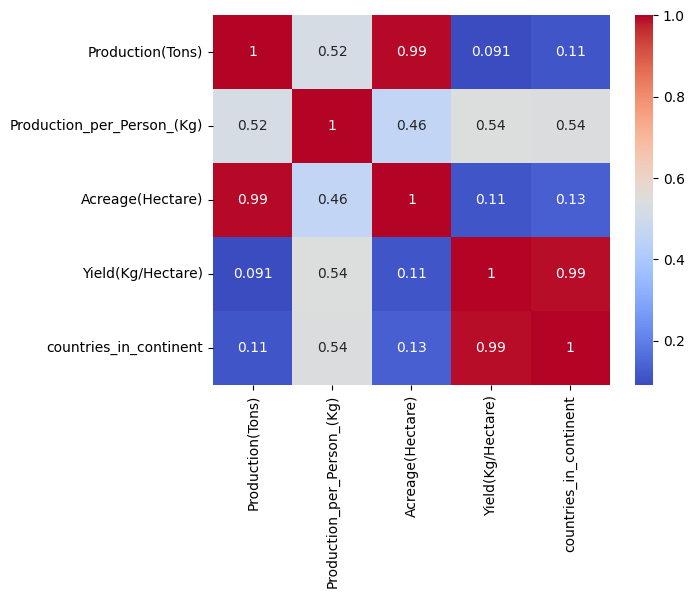

In [53]:
sns.heatmap(df_continent.corr(), annot = True, cmap='coolwarm')